# **WARNING**: The following presentation contains graphic depictions of zombies  
## **ALERT:** A *hypothetical* zombie outbreak has seized Pittsburgh!!! 
![Zombie attack](https://media2.giphy.com/media/v1.Y2lkPTc5MGI3NjExMTI2ZmI3NWY3ZGU1MTIzZWQ2NDcwODYxYzNhODRkNTg0N2M4MmY0OSZlcD12MV9pbnRlcm5hbF9naWZzX2dpZklkJmN0PWc/V3zHRAZGp7Qo8/giphy.gif)  
********************************************

### *AHHHHHHHHHHHHHHHHHH!!!* You're done screaming, but now you may be thinking...
* What do I do??  
* Where do I go??  
* How will I survive??  
* Yay, no more schoool !!!  

### Worry not, we got you! -- Let's find out the best neighborhood in Pittsburgh to hunker down and survive the **end of the world**...

*******************
# **Introduction:**
Our project takes on a more goofy and cheeky approach the best neighborhood concept. We wanted to have as much fun as possible (for a final project haha), and after throwing around a few ideas, we ended on **ZOMBIES**. When consider what approach to take and what aspects we wanted to quantify for best neighborhood, we decided upon:
* access to food  
* access to medical supplies
* population density

as some of the most important factors to survival. Food is obviously crucial for stamina and the upkeep of one's health and energy. Medical supplies are important for tending to wounds and keeping infections at bay. And finally, while we cannot get out of the city, we would like to reduce the number of individuals around us for safety reasons. In the brainstorming process, we considered looking into:
* access to greenspace
* proximity to water

In the end, we found that the features we chose to explore were a good reflection of the best traits a neighborhood could have for apocalyptic survival

**************
# **The Metric**: Best Neighborhood for Surviving a Zombie Apocalyse
## *Features Measured:*
### Population Density
The less people around, the less potential zombies you have to kill off
### Best Access to Supermarkets + convenience stores
The ideal neighborhood has the **fewest** people per food source, so that competition for food access is reduced. *Can't fight zombies on an empty stomach*
### Best Access to Hospitals
The ideal neighborhood has the **fewest** people per hospital, so that that competition for medical supplies is reduced *Taking care of battle wounds is critical for survival*

## *Data Sets Utilized:*
### Population Density
[Pittsburgh Neighborhoods](https://data.wprdc.org/dataset/neighborhoods2)  
[City of Pittsburgh Neighborhood Population 2020](https://data.wprdc.org/dataset/2020-census-redistricting-data-extracts)  
### Best Access to Supermarkets + convenience stores
[Allegheny County Supermarkets & Convenience Stores](https://data.wprdc.org/dataset/allegheny-county-supermarkets-convenience-stores/resource/626357fa-c95d-465f-9a02-3121655b2b78?view_id=a6bdfc00-061c-4586-a7c2-008a0528fa9b)  
### Best Access to Hospitals
[Allegheny County Hospitals](https://data.wprdc.org/dataset/hospitals)
[Allegheny County Primary Care Access](https://data.wprdc.org/dataset/allegheny-county-primary-care-facilities)
********************************** 


# Population Density
The first step to calculating population density was acquiring the population from each 

************************

# Number of People per (Convenience Stores + Supermarkets)

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#using the population density data to get the people/(convenience stores + supermarkets) metric
population = pd.read_csv("pghPopulation2020.csv")
population.head(20)

# iterate through csv and get 2020 population for each neighbohood
# create dictionary w/ neighborhood: population format
neighPop = dict()
for nhood, row in population.iterrows():
    neighPop[row["Neighborhood"]] = row["2020_Total_Population"]
    
print(neighPop)

{'Allegheny Center': 1419, 'Allegheny West': 540, 'Allentown': 2305, 'Arlington - Arlington Heights (Combined)': 2040, 'Banksville': 4127, 'Bedford Dwellings': 1386, 'Beechview': 7596, 'Beltzhoover': 1604, 'Bloomfield': 8665, 'Bluff': 5882, 'Bon Air': 759, 'Brighton Heights': 7105, 'Brookline': 13063, 'California-Kirkbride': 709, 'Carrick': 10290, 'Central Business District (Downtown)': 5477, 'Central Lawrenceville': 4720, 'Central Northside': 2972, 'Central Oakland': 5835, 'Chartiers City': 492, 'Chateau': 19, 'Crafton Heights': 3999, 'Crawford-Roberts': 2293, 'Duquesne Heights': 2397, 'East Allegheny': 1903, 'East Carnegie': 491, 'East Hills': 2892, 'East Liberty': 6187, 'Elliott': 2193, 'Esplen': 322, 'Fairywood': 1092, 'Fineview': 1140, 'Friendship': 1963, 'Garfield': 3643, 'Glen Hazel': 659, 'Greenfield': 7261, 'Hays': 321, 'Hazelwood': 3889, 'Highland Park': 6235, 'Homewood North': 2617, 'Homewood South': 2260, 'Homewood West': 642, 'Knoxville': 3493, 'Larimer': 1545, 'Lincoln Pl

In [13]:
zipdict = {15201: ["LAWRENCEVILLE",  "STANTON HEIGHTS"], 15203: ["SOUTHSIDE"], 15206: ["EAST LIBERTY", "MORNINGSIDE", "EAST END"], 15207: ["HAZELWOOD", "GREENFIELD", "GLENWOOD", "GLEN HAZEL", "HAYS", "LINCOLN PL"], 15208: ["HOMEWOOD", "BRUSHTON", "EAST END", "POINT BREEZE"], 
           15210: ["MT WASHINGTON", "DUQUESNE HEIGHTS"], 15213: ["OAKLAND", "BELLEFIELD"], 15217: ["SQUIRREL HILL", "GREENFIELD", "BROWNS HILL"], 15219: ["UPTOWN", "HERRON HILL", "SCHENLEY HEIGHTS"], 15222: ["DOWNTOWN"], 15224: ["BLOOMFIELD", "GARFIELD"], 15226: ["BROOKLINE", "OVERBROOK"],
           15230: ["VETERAN’S HOSPITAL"], 15260: ["THE UNIVERSITY OF PITTSBURGH"], 15282: ["DUQUESNE UNIVERSITY"]}

In [3]:
# combine supermarkets with convenience stores
conv = pd.read_csv("convenience.csv")

comb = {}
for row in conv['Zip']:
    try:
        zip_code = int(row)
        if zip_code in zipdict:
            for neighborhood in zipdict[zip_code]:
                    if neighborhood in comb:
                        comb[neighborhood] += 1
                    else:
                        comb[neighborhood] = 1
                    
    except:
        continue
print(comb)

{'HAZELWOOD': 4, 'GREENFIELD': 15, 'GLENWOOD': 4, 'GLEN HAZEL': 4, 'HAYS': 4, 'LINCOLN PL': 4, 'DOWNTOWN': 21, 'MT WASHINGTON': 18, 'DUQUESNE HEIGHTS': 18, 'UPTOWN': 17, 'HERRON HILL': 17, 'SCHENLEY HEIGHTS': 17, 'HOMEWOOD': 6, 'BRUSHTON': 6, 'EAST END': 23, 'POINT BREEZE': 6, 'SQUIRREL HILL': 11, 'BROWNS HILL': 11, 'EAST LIBERTY': 17, 'MORNINGSIDE': 17, 'BROOKLINE': 8, 'OVERBROOK': 8, 'OAKLAND': 17, 'BELLEFIELD': 17, 'LAWRENCEVILLE': 7, 'STANTON HEIGHTS': 7, 'SOUTHSIDE': 8, 'BLOOMFIELD': 11, 'GARFIELD': 11, 'DUQUESNE UNIVERSITY': 1}


In [7]:
#num of people divided by Convenience Stores + Supermarkets
div = {}
#convert to uppercase 
for key in neighPop:
    if key.upper() in comb:
        div[key] = (neighPop[key] / comb[key.upper()])
        
print(div)

{'Bloomfield': 787.7272727272727, 'Brookline': 1632.875, 'Duquesne Heights': 133.16666666666666, 'East Liberty': 363.94117647058823, 'Garfield': 331.1818181818182, 'Glen Hazel': 164.75, 'Greenfield': 484.06666666666666, 'Hays': 80.25, 'Hazelwood': 972.25, 'Morningside': 191.2941176470588, 'Overbrook': 435.375, 'Point Breeze': 891.3333333333334, 'Stanton Heights': 632.4285714285714}


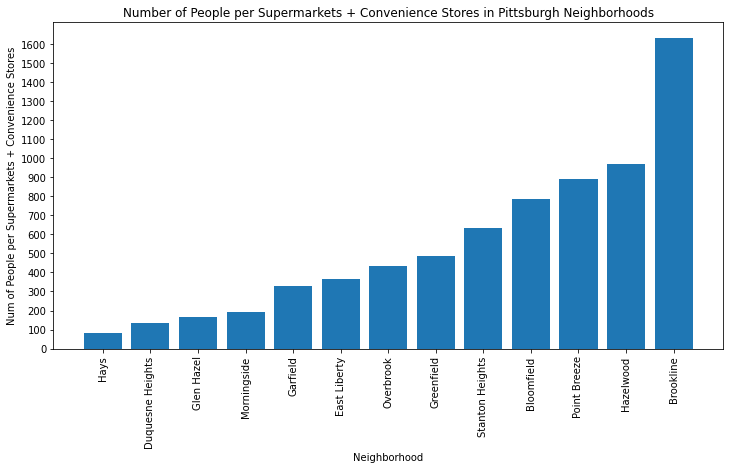

In [8]:
#let's plot this out

df = pd.DataFrame(list(div.items()), columns=['Neighborhood', 'Num of People per Supermarkets + Convenience Stores'])

#largest to smallest
df = df.sort_values(by='Num of People per Supermarkets + Convenience Stores', ascending=True)

#bar graph
plt.figure(figsize=(12, 6))
plt.bar(df['Neighborhood'], df['Num of People per Supermarkets + Convenience Stores'])
plt.xlabel('Neighborhood')
plt.ylabel('Num of People per Supermarkets + Convenience Stores')
plt.title('Number of People per Supermarkets + Convenience Stores in Pittsburgh Neighborhoods')
plt.xticks(rotation=90)
plt.yticks(np.arange(0, max(df['Num of People per Supermarkets + Convenience Stores'])+1, 100))
plt.show()

Analysis:

*********

# Number of People per (Hospital + Primary Care)

In [24]:
# load required libraries
import pandas as pd

# load the hospital and primary care data
hospi = pd.read_csv('pittsburgh_hospitals.csv')
pri_care = pd.read_csv('pittsburgh_primary_care.csv')

# load the neighborhood and population data
population = pd.read_csv('pghPopulation2020.csv')

# create dictionaries to store the counts of hospitals, primary care facilities, and total health facilities in each neighborhood
hospitals_count = {}
primary_care_count = {}
total_health_facilities_count = {}

# iterate through the 'hospi' data frame and update the 'hospitals_count' and 'total_health_facilities_count' dictionaries
for index, row in hospi.iterrows():
    try:
        zip_code = int(row['ZIP'])
        if zip_code in zipdict:
            for neighborhood in zipdict[zip_code]:
                if neighborhood in hospitals_count:
                    hospitals_count[neighborhood] += 1
                else:
                    hospitals_count[neighborhood] = 1
                if neighborhood in total_health_facilities_count:
                    total_health_facilities_count[neighborhood] += 1
                else:
                    total_health_facilities_count[neighborhood] = 1
    except:
        continue

# iterate through the 'pri_care' data frame and update the 'primary_care_count' and 'total_health_facilities_count' dictionaries
for index, row in pri_care.iterrows():
    try:
        zip_code = int(row['PRACTICE_ZIP'])
        if zip_code in zipdict:
            for neighborhood in zipdict[zip_code]:
                if neighborhood in primary_care_count:
                    primary_care_count[neighborhood] += 1
                else:
                    primary_care_count[neighborhood] = 1
                if neighborhood in total_health_facilities_count:
                    total_health_facilities_count[neighborhood] += 1
                else:
                    total_health_facilities_count[neighborhood] = 1
    except:
        continue

# print the counts of hospitals, primary care facilities, and total health facilities in each neighborhood
for zip_code in zipdict.keys():
    neighborhood_list = zipdict[zip_code]
    hospitals = hospitals_count.get(neighborhood_list[0], 0)
    primary_care = primary_care_count.get(neighborhood_list[0], 0)
    for neighborhood in neighborhood_list[1:]:
        hospitals += hospitals_count.get(neighborhood, 0)
        primary_care += primary_care_count.get(neighborhood, 0)
    total_health_facilities = hospitals + primary_care
    population = neighPop.get(neighborhood_list[0], 0)
    print(f"Zip Code: {zip_code}")
    print(f"Neighborhoods: {neighborhood_list}")
    print(f"Population: {population}")
    print(f"Hospitals: {hospitals}")
    print(f"Primary Care Facilities: {primary_care}")
    print(f"Total Health Facilities: {total_health_facilities}")
    print()


Zip Code: 15201
Neighborhoods: ['LAWRENCEVILLE', 'STANTON HEIGHTS']
Population: 0
Hospitals: 0
Primary Care Facilities: 8
Total Health Facilities: 8

Zip Code: 15203
Neighborhoods: ['SOUTHSIDE']
Population: 0
Hospitals: 0
Primary Care Facilities: 14
Total Health Facilities: 14

Zip Code: 15206
Neighborhoods: ['EAST LIBERTY', 'MORNINGSIDE', 'EAST END']
Population: 0
Hospitals: 0
Primary Care Facilities: 48
Total Health Facilities: 48

Zip Code: 15207
Neighborhoods: ['HAZELWOOD', 'GREENFIELD', 'GLENWOOD', 'GLEN HAZEL', 'HAYS', 'LINCOLN PL']
Population: 0
Hospitals: 0
Primary Care Facilities: 39
Total Health Facilities: 39

Zip Code: 15208
Neighborhoods: ['HOMEWOOD', 'BRUSHTON', 'EAST END', 'POINT BREEZE']
Population: 0
Hospitals: 0
Primary Care Facilities: 27
Total Health Facilities: 27

Zip Code: 15210
Neighborhoods: ['MT WASHINGTON', 'DUQUESNE HEIGHTS']
Population: 0
Hospitals: 0
Primary Care Facilities: 12
Total Health Facilities: 12

Zip Code: 15213
Neighborhoods: ['OAKLAND', 'BELLEF

In [33]:
#num of people divided by Total health Facilities
div = {}
#convert to uppercase 
for key in neighPop:
    if key.upper() in comb:
        div[key] = (neighPop[key] / total_health_facilities_count[key.upper()])
        
print(div)

{'Bloomfield': 433.25, 'Brookline': 2612.6, 'Duquesne Heights': 399.5, 'East Liberty': 412.46666666666664, 'Garfield': 182.15, 'Glen Hazel': 164.75, 'Greenfield': 382.1578947368421, 'Hays': 80.25, 'Hazelwood': 972.25, 'Morningside': 216.8, 'Overbrook': 696.6, 'Point Breeze': 1782.6666666666667, 'Stanton Heights': 1106.75}


In [34]:
#let's plot this out

df = pd.DataFrame(list(div.items()), columns=['Neighborhood', 'Num of People per Hosptials + Primary Care'])

#largest to smallest
df = df.sort_values(by='Num of People per Hosptials + Primary Care', ascending=True)

#bar graph
plt.figure(figsize=(12, 6))
plt.bar(df['Neighborhood'], df['Num of People per Supermarkets + Convenience Stores'])
plt.xlabel('Neighborhood')
plt.ylabel('Num of People per Supermarkets + Convenience Stores')
plt.title('Number of People per Supermarkets + Convenience Stores in Pittsburgh Neighborhoods')
plt.xticks(rotation=90)
plt.yticks(np.arange(0, max(df['Num of People per Supermarkets + Convenience Stores'])+1, 100))
plt.show()

NameError: name 'people_per_health_facilitie' is not defined